### imports

In [ ]:
import torch
import numpy as np

### Back Propagation

In [ ]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w1 = torch.tensor(5.0, requires_grad=True)
w2 = torch.tensor(10.0, requires_grad=True)

r = (x+y)*2

for i in range(3):
    #forward
    z = x*w1 +y*w2
    print(z)

    loss = (z-r)**2

    #back
    loss.backward()
    print(w1.grad)
    print(w2.grad)

    with torch.no_grad():
      w1 -= 0.1*w1.grad
      w2 -= 0.1*w2.grad

      w1.grad.zero_()
      w2.grad.zero_()


tensor(25., grad_fn=<AddBackward0>)
tensor(38.)
tensor(76.)
tensor(6., grad_fn=<AddBackward0>)
tensor(0.)
tensor(0.)
tensor(6., grad_fn=<AddBackward0>)
tensor(0.)
tensor(0.)


In [ ]:
x = torch.tensor(10, device="cuda")
print(x)

tensor(10, device='cuda:0')


Fazendo o treinamento com numpy

In [ ]:
# f = w * x
# f = 2 * x

X = np.array([1,2,3,4], dtype=np.float32)
Y = np.array([2,4,6,8], dtype=np.float32)

w = 0.0

#model prediction
def forward(x):
  return w * x
#loss = MSE
def loss(y,y_prediction):
  return ((y_prediction - y) ** 2).mean()

#gradient
# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x - y)
def gradient(x,y,y_predicted):
  return np.dot(2*x, y_predicted - y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

#Training
learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
  #prediction = forward_pass
  y_pred = forward(X)

  #loss
  l = loss(Y,y_pred)

  #gradients
  dw = gradient(X, Y, y_pred)

  #update weights
  w -= learning_rate * dw

  if epoch % 1 == 0:
    print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 2: w = 1.680, loss = 4.80000067
epoch 3: w = 1.872, loss = 0.76800019
epoch 4: w = 1.949, loss = 0.12288000
epoch 5: w = 1.980, loss = 0.01966083
epoch 6: w = 1.992, loss = 0.00314574
epoch 7: w = 1.997, loss = 0.00050332
epoch 8: w = 1.999, loss = 0.00008053
epoch 9: w = 1.999, loss = 0.00001288
epoch 10: w = 2.000, loss = 0.00000206
Prediction after training: f(5) = 9.999


### Fazendo o treinamento com PyTorch

In [ ]:
# f = w * x
# f = 2 * x

X = torch.tensor([1,2,3,4], dtype=torch.float32)
Y = torch.tensor([2,4,6,8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

#model prediction
def forward(x):
  return w * x
#loss = MSE
def loss(y,y_prediction):
  return ((y_prediction - y) ** 2).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

#Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
  #prediction = forward_pass
  y_pred = forward(X)

  #loss
  l = loss(Y,y_pred)

  #gradients
  l.backward() # dl/dw PyTorch do all the computation of local gradients

  #update weights
  with torch.no_grad():
    w -= learning_rate * w.grad

  #zero gradients
  w.grad.zero_()

  if epoch % 10 == 0:
    print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [ ]:
#1 ) Design model (input, output size, forward pass)
#2 ) Construct loss and optimizer
#3 ) Traning loop
#  - forward pass: compute prediction
#  - backward pass: gradients
#  - update weights

import torch
import torch.nn as nn
# f = w * x
# f = 2 * x

X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)
n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

#model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    #define layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)

model = LinearRegression(input_size, output_size)

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

#Training
learning_rate = 0.01
n_iters = 100
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
  #prediction = forward_pass
  y_pred = model(X)

  #loss
  l = loss(Y,y_pred)

  #gradients
  l.backward() # dl/dw PyTorch do all the computation of local gradients

  #update weights
  optimizer.step()
  #zero gradients
  optimizer.zero_grad()

  if epoch % 10 == 0:
    [w, b] = model.parameters()
    print(f'epoch {epoch + 1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')


4 1
Prediction before training: f(5) = 2.948
epoch 1: w = 0.925, loss = 16.61024857
epoch 11: w = 1.858, loss = 0.43163365
epoch 21: w = 2.007, loss = 0.01294493
epoch 31: w = 2.030, loss = 0.00200897
epoch 41: w = 2.033, loss = 0.00162860
epoch 51: w = 2.032, loss = 0.00152699
epoch 61: w = 2.031, loss = 0.00143794
epoch 71: w = 2.031, loss = 0.00135424
epoch 81: w = 2.030, loss = 0.00127540
epoch 91: w = 2.029, loss = 0.00120117
Prediction before training: f(5) = 10.058


###Linear Regression

epoch: 10, loss = 4439.2251
epoch: 20, loss = 3310.5303
epoch: 30, loss = 2494.0000
epoch: 40, loss = 1902.6608
epoch: 50, loss = 1473.9783
epoch: 60, loss = 1162.9244
epoch: 70, loss = 937.0290
epoch: 80, loss = 772.8491
epoch: 90, loss = 653.4370
epoch: 100, loss = 566.5279


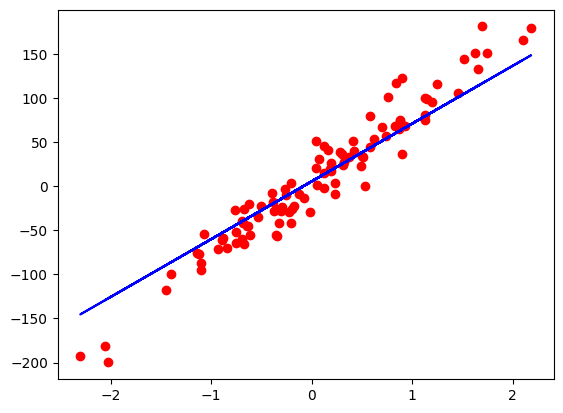

In [ ]:
# Design model (input, output size, forward pass)
# Construc loss and optimizer
# Training Loop
#  - forward pass: compute prediction and loss
#  - backward pass: gradients
#  - update weights

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

#preprocess (prepare data)
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1,
                                            noise=20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))# they were double before
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1) #reshape our tensor

n_samples, n_features = X.shape

# step 1 - model
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

# step 2 - loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) #Stochastic Gradient Descent

# step 3 - traning loop
num_epochs = 100
for epoch in range(num_epochs):
  #forward pass and loss
  y_predicted = model(X)
  loss = criterion(y_predicted, y) # Predicted and actual values

  #backward pass
  loss.backward()

  #update
  optimizer.step()
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

#plot
predicted = model(X).detach() #don't show in the graph (create a new tensor where the req_gradient is false)

plt.plot(X_numpy, y_numpy, 'ro') # red dots = ro
plt.plot(X_numpy, predicted, 'b') # blue line = b

### Logistic Regression

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 0 Prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples,  n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1) #reshape the tensor, each value in one row
y_test = y_test.view(y_test.shape[0],1)

# 1 - Model
# f = wx + b, sigmoid at the end
class LogisticRegression(nn.Module):

  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features,1)

  def forward(self,x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

model = LogisticRegression(n_features)

# 2 - Loss and optimizer
# loss is different from the linear regression case
#Binary Cross Entropy
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3 - training loop
num_epochs = 100
for epoch in range(num_epochs):
  #forward pass and loss
  y_predicted = model(X_train)
  loss = criterion(y_predicted, y_train)

  #backward pass
  loss.backward()

  #updates
  optimizer.step()

  #zero gradients because backward function add up the old gradients
  optimizer.zero_grad()

  if(epoch+1) % 10 ==0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

with torch.no_grad(): #creates the tensor with req_gradient=False
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round()
  accuracy = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0]) #every correct it add plus one
  print(f'accuracy = {accuracy:.4f}')

epoch: 10, loss = 0.4478
epoch: 20, loss = 0.3914
epoch: 30, loss = 0.3520
epoch: 40, loss = 0.3227
epoch: 50, loss = 0.2998
epoch: 60, loss = 0.2812
epoch: 70, loss = 0.2657
epoch: 80, loss = 0.2526
epoch: 90, loss = 0.2413
epoch: 100, loss = 0.2314
accuracy = 0.9123


### Dataset and DataLoader

In [ ]:
#https://raw.githubusercontent.com/patrickloeber/pytorchTutorial/refs/heads/master/data/wine/wine.csv
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math


class WineDataset(Dataset): #inherit Dataset
  def __init__(self):
    #data loading
    xy = np.loadtxt('wine.csv', delimiter=',', dtype=np.float32, skiprows=1) #jump the header row
    self.x = torch.from_numpy(xy[:, 1:])
    self.y = torch.from_numpy(xy[:, [0]]) # n_samples, 1
    self.n_samples = xy.shape[0]

  def __getitem__(self,index): #  funciona com braskets x[n]
    # dataset[0]
    return self.x[index], self.y[index]

  def __len__(self): # len() não funcionaria, precisa do __.__
    #len(dataset)
    return self.n_samples


dataset = WineDataset()
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

datatiter = iter(dataloader)
data = next(datatiter)
features, labels = data

#training_loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)

for epoch in range(num_epochs):
  for i, (inputs, labels) in enumerate(dataloader):
    # forward backward, update weights
    if (i+1) % 5 ==0:
      print(f'epoch {epoch+1}/{num_epochs}, step{i+1}/{n_iterations}, inputs {inputs.shape}')


epoch 1/2, step5/45, inputs torch.Size([4, 13])
epoch 1/2, step10/45, inputs torch.Size([4, 13])
epoch 1/2, step15/45, inputs torch.Size([4, 13])
epoch 1/2, step20/45, inputs torch.Size([4, 13])
epoch 1/2, step25/45, inputs torch.Size([4, 13])
epoch 1/2, step30/45, inputs torch.Size([4, 13])
epoch 1/2, step35/45, inputs torch.Size([4, 13])
epoch 1/2, step40/45, inputs torch.Size([4, 13])
epoch 1/2, step45/45, inputs torch.Size([2, 13])
epoch 2/2, step5/45, inputs torch.Size([4, 13])
epoch 2/2, step10/45, inputs torch.Size([4, 13])
epoch 2/2, step15/45, inputs torch.Size([4, 13])
epoch 2/2, step20/45, inputs torch.Size([4, 13])
epoch 2/2, step25/45, inputs torch.Size([4, 13])
epoch 2/2, step30/45, inputs torch.Size([4, 13])
epoch 2/2, step35/45, inputs torch.Size([4, 13])
epoch 2/2, step40/45, inputs torch.Size([4, 13])
epoch 2/2, step45/45, inputs torch.Size([2, 13])


### Dataset Transforms

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math


class WineDataset(Dataset): #inherit Dataset
  def __init__(self,  transform=None):
    #data loading
    xy = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/arquivos/wine.csv', delimiter=',', dtype=np.float32, skiprows=1) #jump the header row
    self.n_samples = xy.shape[0]

    self.x = xy[:, 1:]
    self.y = xy[:, [0]]

    self.transform = transform


  def __getitem__(self,index): #  funciona com braskets x[n]
    sample = self.x[index], self.y[index]

    if self.transform:
      sample = self.transform(sample)

    return sample

  def __len__(self): # len() não funcionaria, precisa do __.__
    #len(dataset)
    return self.n_samples

class ToTensor: #custom transform
  def __call__(self, sample): #callable object
    inputs, targets = sample
    return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform:   # multiplication transform
  def __init__(self, factor):
    self.factor = factor

  def __call__(self, sample):
    inputs, target = sample
    inputs *= self.factor

    return inputs, target

dataset = WineDataset(transform=ToTensor())
firstz_data = dataset[0]
features, labels = firstz_data
print(features)
print(type(features))
print(type(labels))


#list of our transformationss
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)])

dataset2= WineDataset(transform=composed)
first_data = dataset2[0]
features,labels = first_data
print(features)
print(type(features), type(labels))



tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03])
<class 'torch.Tensor'>
<class 'torch.Tensor'>
tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
        6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
        2.1300e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>


### Softmax and Cross-Entropy

In [ ]:
import torch
import torch.nn as nn
import numpy as np

#creating softmax function
def softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis = 0)

x = np.array([2.0,1.0,0.1])
outputs = softmax(x)
print('softmax numpy: ', outputs)

x = torch.tensor([2.0,1.0,0.1])
outputs = torch.softmax(x, dim=0) #softmax from pytorch
print(outputs)


softmax numpy:  [0.65900114 0.24243297 0.09856589]
tensor([0.6590, 0.2424, 0.0986])


In [ ]:
#cross-entropy
#the better the prediction, the lower the loss
import torch
import torch.nn as nn
import numpy as np

def cross_entropy(actual, predicted):
  loss = -np.sum(actual * np.log(predicted))
  return loss

#y must be one hot encoded
# if class 0: [1 0 0]
# if class 1: [0 1 0]
# if class 2: [0 0 1]

Y = np.array([1, 0, 0])

# y_pred has the probabilities
Y_pred_good = np.array([0.7, 0.2, 0.1]) # after softmax
Y_pred_bad = np.array([0.1,0.3,0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f'Loss 1 numpy: {l1:.4f}')
print(f'Loss 2 numpy: {l2:.4f}')

Loss 1 numpy: 0.3567
Loss 2 numpy: 2.3026


Cross entropy in Pytorch

In [ ]:
import torch
import torch.nn as nn
import numpy as np

#already do the softmax, dont implement yourself
loss = nn.CrossEntropyLoss()

# 3 samples, first is class 2, second 0 and third 1
Y = torch.tensor([2,0,1])

#size -> n_samples x nclasses = 3x3
#raw value, dont apply softmax
Y_pred_good = torch.Tensor([[1.0,1.0,2.1],[2.0,1.0,0.1],[0.0,3.0,0.1]])
Y_pred_bad = torch.tensor([[0.5,2.0,0.3],[0.2,1.0,0.1],[2.5,1.0,0.1]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f'Loss 1 numpy: {l1.item():.4f}')
print(f'Loss 2 numpy: {l2.item():.4f}')

#to get the actual prediction
_, prediction1 = torch.max(Y_pred_good, 1)
_, prediction2 = torch.max(Y_pred_bad,1)

print(f'pred 1 = {prediction1}')
print(f'pred 2 = {prediction2}')

Loss 1 numpy: 0.3423
Loss 2 numpy: 1.7440
pred 1 = tensor([2, 0, 1])
pred 2 = tensor([1, 1, 0])


Example of neural network MultiClass case

In [ ]:
import torch
import torch.nn

#multiclass problem
class NeuralNet2(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet2, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    # no softmax at the end
    return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss() #already applies Softmax

Binary Classification case (yes or no)

In [ ]:
import torch
import torch.nn as nn

#Binary Classification
class NeuralNet1(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNet1, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, 1)

  def forward(self,x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    #sigmoid at the end
    y_pred = torch.sigmoid(out)
    return y_pred

model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss()

### Activation Functions

Activation functions apply a non-linear transformation and decide whether a neuron should be activated or not:
1. step function (0 or 1)
2. sigmoid (between 0 and 1)
3. TanH (between -1 and 1)
4. ReLU (negatives are 0)
5. Leaky ReLU (negatives has small value)
6. Softmax (give a probabilite that sums up to 1)

In [ ]:
# making a neural network with all the functions
import torch
import torch.nn as nn

#nn.Sigmoid
#nn.Softmax
#nn.TanH
#nn.LeakyReLU
#torch.softmax
#torch.tanh . . . etc
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNet, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, 1)
    self.sigmoid = nn.sigmoid()

  def forward(self,x):
    out = self.linear(x)
    out = self.relu(out)
    out = self.linear2(out)
    out = self.sigmoid(out)
    return out

# option 2 (use activation functions directly in forward pass)

class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNet, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.linear2 = nn.Linear(hidden_size, 1)

  def forward(self,x):
    out = torch.relu(self.linear1(x))
    out = torch.sigmoid(self.linear2(out))
    return out

### Feed-Forward Neural Network